In [98]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [99]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [100]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [101]:
len(x_train)

60000

In [102]:
x_train[0].shape

(28, 28)

In [103]:
len(x_test)

10000

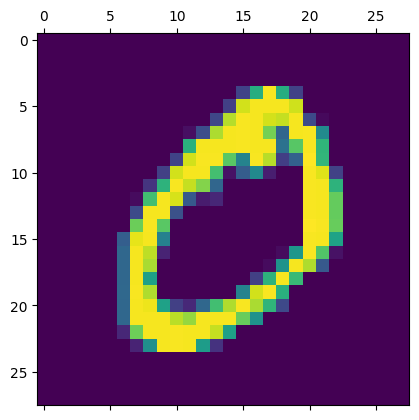

In [104]:
plt.matshow(x_train[1])

In [105]:
len(y_train)

60000

Scaling the values

In [106]:
x_train = x_train/255
x_test = x_test/255

Flatting the array

In [107]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [108]:
x_train_flattened.shape

(60000, 784)

In [109]:
x_test_flattened.shape

(10000, 784)

In [110]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Creating a nueral network

In [111]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=8)

Epoch 1/8


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.8058 - loss: 0.7287
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.9137 - loss: 0.3093
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9180 - loss: 0.2874
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.9241 - loss: 0.2725
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9260 - loss: 0.2655
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9276 - loss: 0.2588
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.9267 - loss: 0.2631
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.9289 - loss: 0.2524


Evaluating in test dataset

In [112]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.9174 - loss: 0.2988


[0.264075368642807, 0.9282000064849854]

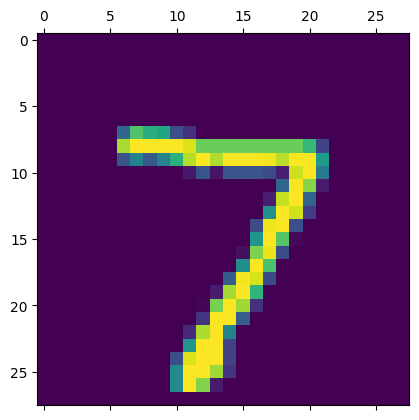

In [113]:
plt.matshow(x_test[0])

In [114]:
y_predicated = model.predict(x_test_flattened)
y_predicated[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step


array([6.3517014e-03, 3.2182577e-08, 3.7780035e-02, 9.6556866e-01,
       2.1240360e-03, 1.5453489e-01, 7.3937905e-08, 9.9985778e-01,
       7.1760856e-02, 7.3096132e-01], dtype=float32)

In [115]:
np.argmax(y_predicated[0])

7

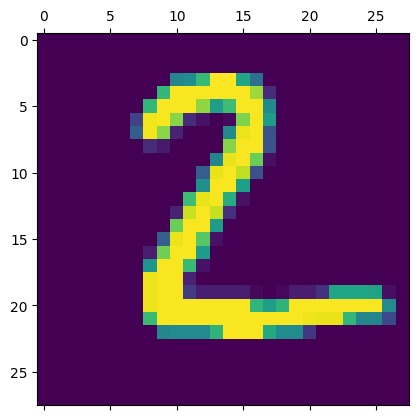

In [116]:
plt.matshow(x_test[1])

In [117]:
y_predicated[1]

array([2.9139984e-01, 3.1590716e-03, 9.9980617e-01, 3.1783426e-01,
       6.8345295e-11, 9.2344624e-01, 9.0349275e-01, 2.4743218e-14,
       1.2898548e-01, 7.8928281e-11], dtype=float32)

In [118]:
np.argmax(y_predicated[1])

2

Confusion matrix

In [119]:
y_predicated_labels = [np.argmax(i) for i in y_predicated]

In [120]:
y_predicated_labels[:5]

[7, 2, 1, 0, 4]

In [121]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicated_labels)

In [122]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    3,    2,    0,    7,    6,    3,    1,    1],
       [   0, 1110,    4,    2,    0,    2,    4,    2,   11,    0],
       [   3,    6,  951,   13,    8,    5,   11,    8,   22,    5],
       [   1,    0,   21,  915,    1,   32,    2,    9,   16,   13],
       [   1,    1,    6,    1,  916,    0,    7,    4,    9,   37],
       [   7,    1,    5,   21,    8,  804,   11,    6,   24,    5],
       [   9,    3,    9,    1,    8,   22,  902,    2,    2,    0],
       [   1,    6,   25,    6,    8,    1,    0,  938,    2,   41],
       [   6,    5,    8,   20,    9,   41,    9,   10,  851,   15],
       [   8,    5,    2,   10,   22,    8,    0,   12,    4,  938]])>

In [123]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Text(95.72222222222221, 0.5, 'Truth')

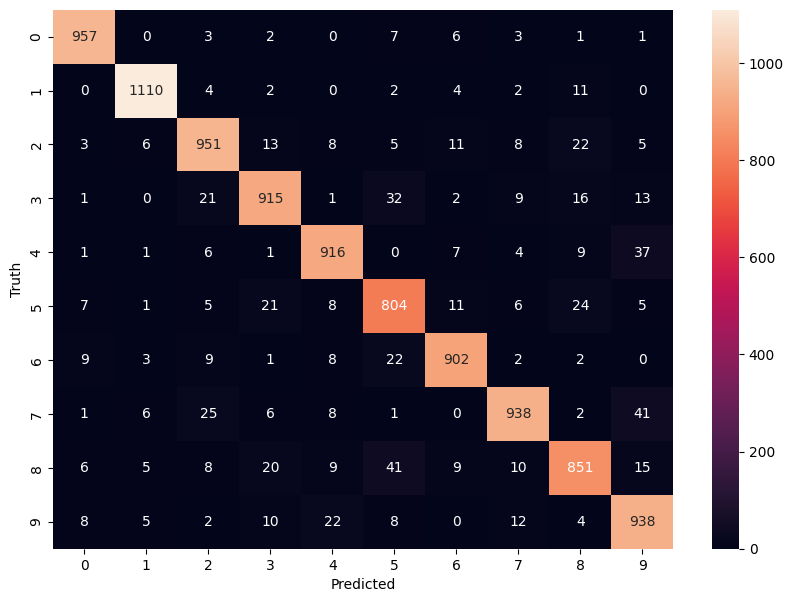

In [124]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [125]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8690 - loss: 0.4583
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9623 - loss: 0.1302
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9740 - loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9803 - loss: 0.0649
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.9860 - loss: 0.0479


In [126]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8724 - loss: 0.4606
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9610 - loss: 0.1337
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9749 - loss: 0.0852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9807 - loss: 0.0636
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0486


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step


Text(95.72222222222221, 0.5, 'Truth')

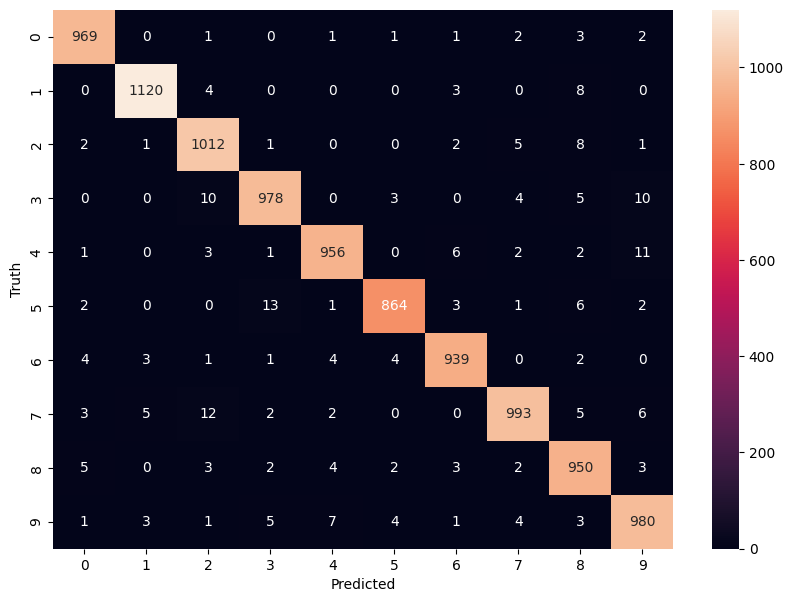

In [127]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')